In [ ]:
!pip install fbprophet

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from fbprophet.utilities import regressor_coefficients
from google.colab import files

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Load the dataset using pandas
data = pd.read_csv("ETH-USD-Modified.csv") 
data.head(10)

,Date,Close,weighted_sentiment,Close_Diff,Sentiment_Diff
0,2021-07-19,1817.296631,0.305185,0.000000,0.000000
1,2021-07-20,1787.510742,0.087087,-29.785889,-0.218098
2,2021-07-21,1990.970825,0.291774,203.460083,0.204687
3,2021-07-22,2025.202759,0.393122,34.231934,0.101348
4,2021-07-23,2124.776611,0.666671,99.573852,0.273549
5,2021-07-24,2189.218750,0.552629,64.442139,-0.114042
6,2021-07-25,2191.373779,0.181296,2.155029,-0.371334


In [ ]:
data.dtypes
data['Date'] = pd.to_datetime(data['Date'])
data.dtypes
data.head(10)

,Date,Close,weighted_sentiment,Close_Diff,Sentiment_Diff
0,2021-07-19,1817.296631,0.305185,0.000000,0.000000
1,2021-07-20,1787.510742,0.087087,-29.785889,-0.218098
2,2021-07-21,1990.970825,0.291774,203.460083,0.204687
3,2021-07-22,2025.202759,0.393122,34.231934,0.101348
4,2021-07-23,2124.776611,0.666671,99.573852,0.273549
5,2021-07-24,2189.218750,0.552629,64.442139,-0.114042
6,2021-07-25,2191.373779,0.181296,2.155029,-0.371334


In [ ]:
data.columns = ['ds', 'y', 'ws', 'cd', 'sd']#renaming the columns of the dataset
data.head(10)

,ds,y,ws,cd,sd
0,2021-07-19,1817.296631,0.305185,0.000000,0.000000
1,2021-07-20,1787.510742,0.087087,-29.785889,-0.218098
2,2021-07-21,1990.970825,0.291774,203.460083,0.204687
3,2021-07-22,2025.202759,0.393122,34.231934,0.101348
4,2021-07-23,2124.776611,0.666671,99.573852,0.273549
5,2021-07-24,2189.218750,0.552629,64.442139,-0.114042
6,2021-07-25,2191.373779,0.181296,2.155029,-0.371334


In [ ]:
from fbprophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.add_regressor('ws')
#m.add_regressor('cd')
m.add_regressor('sd')
m.fit(data) # fit the model using all data
data.dtypes

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 4.


ds    datetime64[ns]
y            float64
ws           float64
cd           float64
sd           float64
dtype: object

          ds            y        ws          cd        sd
0 2021-07-19  1817.296631  0.305185    0.000000  0.000000
1 2021-07-20  1787.510742  0.087087  -29.785889 -0.218098
2 2021-07-21  1990.970825  0.291774  203.460083  0.204687
3 2021-07-22  2025.202759  0.393122   34.231934  0.101348
4 2021-07-23  2124.776611  0.666671   99.573852  0.273549
5 2021-07-24  2189.218750  0.552629   64.442139 -0.114042
6 2021-07-25  2191.373779  0.181296    2.155029 -0.371334
Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'extra_regressors_additive',
       'extra_regressors_additive_lower', 'extra_regressors_additive_upper',
       'sd', 'sd_lower', 'sd_upper', 'ws', 'ws_lower', 'ws_upper',
       'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')


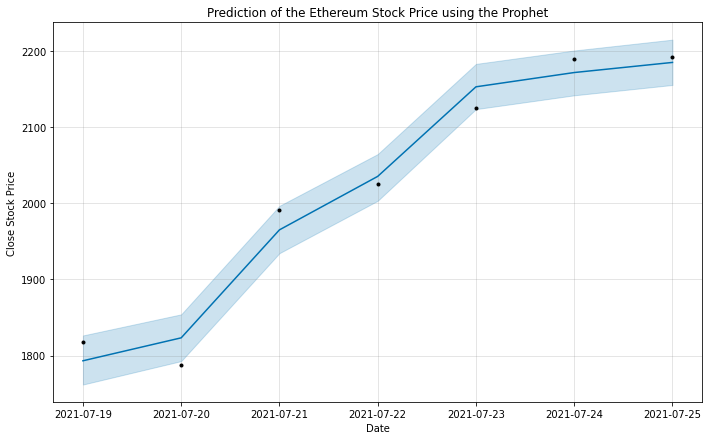

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
future = m.make_future_dataframe(periods=1) #we need to specify the number of days in future
future = future.merge(data, on='ds')
print(future)
prediction = m.predict(future)
print(prediction.columns)
m.plot(prediction)
plt.title("Prediction of the Ethereum Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.savefig("ETH-Sentiment.png", bbox_inches='tight')
plt.show()
files.download("ETH-Sentiment.png")

In [ ]:
trend = prediction.trend.values
x = 0
for i in range(len(trend)-1):
  x += trend[i+1] - trend[i]
x = x/(len(trend)-1)
#print(x)

In [ ]:
#set this value to the predicted day's closing price (day 8)
day8_closing = 2332.62
y_true = data.y.values
y_true = np.append(y_true, day8_closing)
print("Real prices: ", y_true)
y_pred = prediction.yhat.values
y_pred = np.append(y_pred, y_true[6]+x)
print("Predicted prices: ", y_pred)
mse = mean_squared_error(y_true=y_true, y_pred=y_pred)#, squared=False)
print("MSE =", mse)
mae = mean_absolute_error(y_true=y_true, y_pred=y_pred)
print("MAE =", mae)
r2 = r2_score(y_true=y_true, y_pred=y_pred)
print("r^2 =", r2)

[1817.296631 1787.510742 1990.970825 2025.202759 2124.776611 2189.21875
 2191.373779 2332.62    ]
[1793.29198873 1823.40807459 1965.11080049 2035.29280364 2152.83289717
 2171.56843315 2184.83852031 2265.74045381]
MSE = 1031.207923663756
MAE = 26.87168148778045
r^2 = 0.967204696062755


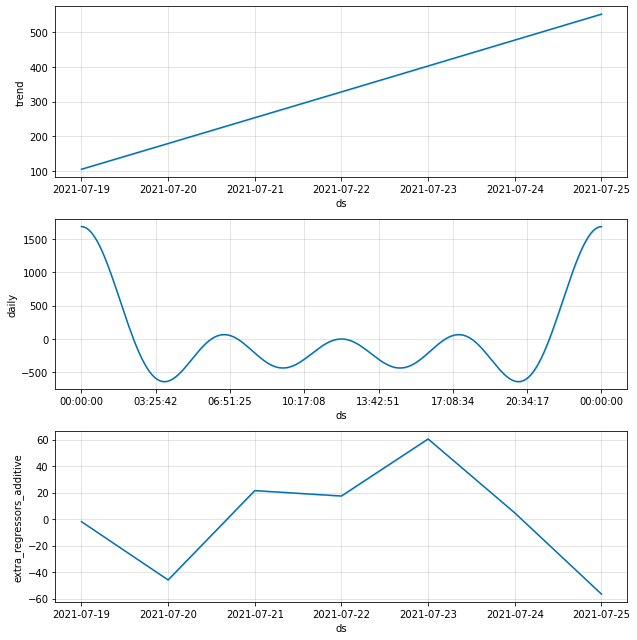

In [ ]:
m.plot_components(prediction)
plt.show()

In [ ]:
#https://realpython.com/python-nltk-sentiment-analysis/#using-nltks-pre-trained-sentiment-analyzer
#https://futurice.com/blog/business-forecasting-with-facebook-prophet